<a href="https://colab.research.google.com/github/PSYCHOLOGIST1261992/covid19-india-eda/blob/main/COVID__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import files
uploaded = files.upload()


Saving covid_19_india.csv to covid_19_india (2).csv


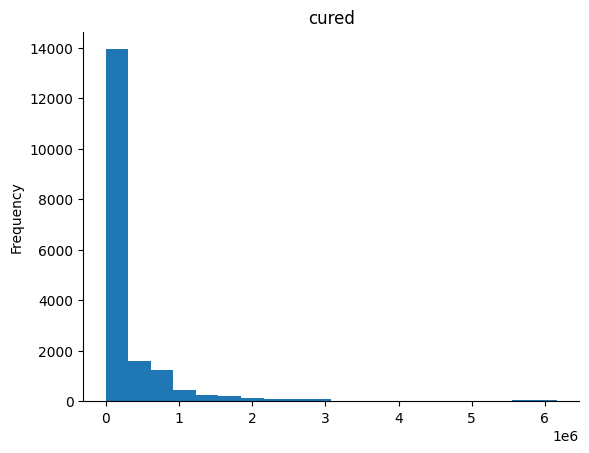

In [47]:
# @title cured

from matplotlib import pyplot as plt
df['cured'].plot(kind='hist', bins=20, title='cured')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('covid_19_india.csv')

# Show first few rows
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [37]:
df.head()

,date,time,state/unionterritory,confirmedindiannational,confirmedforeignnational,cured,deaths,confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [36]:
df.shape

(18110, 8)

In [26]:
df.isnull().sum()


,0
Sno,0
Date,0
Time,0
State/UnionTerritory,0
ConfirmedIndianNational,0
ConfirmedForeignNational,0
Cured,0
Deaths,0
Confirmed,0


df.info()

In [39]:
df = df.drop_duplicates()

In [40]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      18110 non-null  object
 1   time                      18110 non-null  object
 2   state/unionterritory      18110 non-null  object
 3   confirmedindiannational   18110 non-null  object
 4   confirmedforeignnational  18110 non-null  object
 5   cured                     18110 non-null  int64 
 6   deaths                    18110 non-null  int64 
 7   confirmed                 18110 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


,0
date,0
time,0
state/unionterritory,0
confirmedindiannational,0
confirmedforeignnational,0
cured,0
deaths,0
confirmed,0


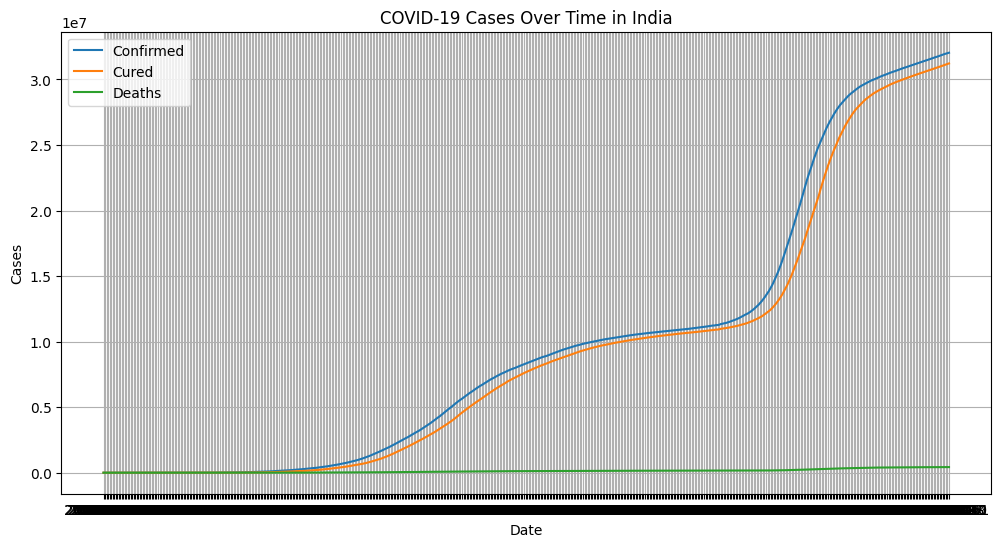

In [41]:
daily = df.groupby('date')[['confirmed', 'cured', 'deaths']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily['date'], daily['confirmed'], label='Confirmed')
plt.plot(daily['date'], daily['cured'], label='Cured')
plt.plot(daily['date'], daily['deaths'], label='Deaths')
plt.legend()
plt.title("COVID-19 Cases Over Time in India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.show()


<ipython-input-42-0aa0531a70c3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise['confirmed'], y=statewise.index, palette='Reds_r')


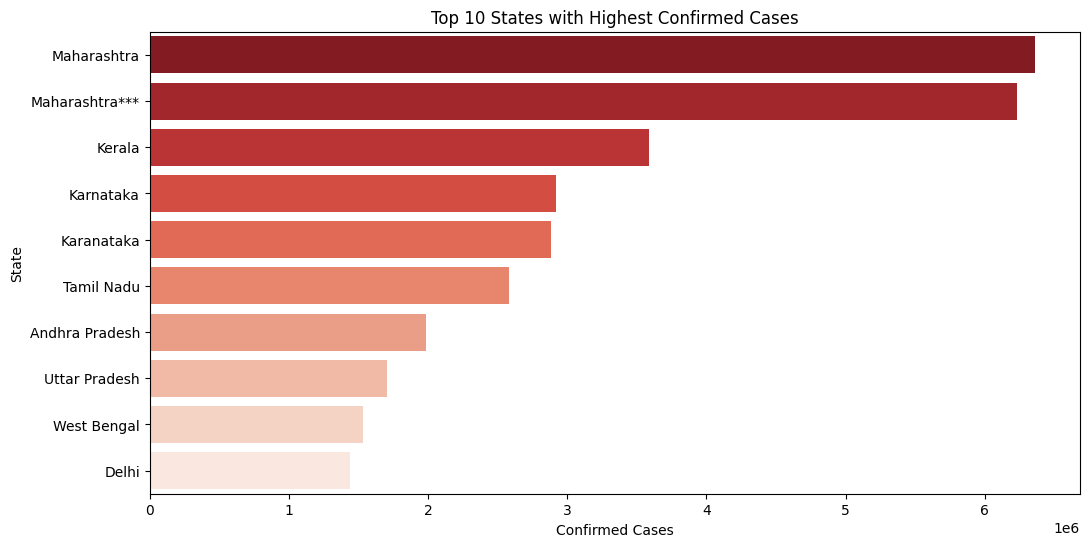

In [42]:
statewise = df.groupby('state/unionterritory')[['confirmed', 'cured', 'deaths']].max().sort_values(by='confirmed', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=statewise['confirmed'], y=statewise.index, palette='Reds_r')
plt.title("Top 10 States with Highest Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("State")
plt.show()


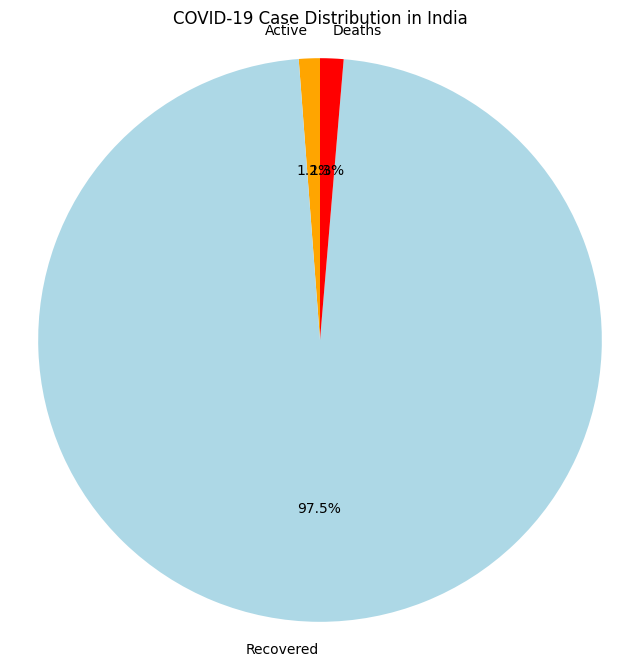

In [46]:
latest = df[df['date'] == df['date'].max()].groupby('state/unionterritory')[['confirmed', 'deaths', 'cured']].sum().sum()
labels = ['Active', 'Recovered', 'Deaths']
sizes = [
    latest['confirmed'] - latest['deaths'] - latest['cured'],
    latest['cured'],
    latest['deaths']
]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', 'lightblue', 'red'], startangle=90)
plt.title("COVID-19 Case Distribution in India")
plt.axis('equal')
plt.show()


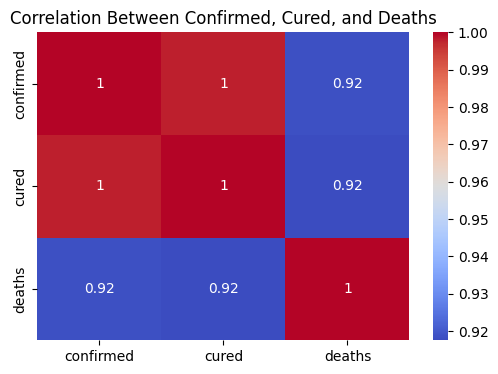

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['confirmed', 'cured', 'deaths']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Confirmed, Cured, and Deaths")
plt.show()


In [ ]:
#### 🔍 Key Insights

- Maharashtra and Delhi had the highest number of confirmed cases.
- The recovery rate improved steadily over time.
- Most of the cases were concentrated in 5-6 key states.
- The death rate was significantly lower than recovery rate.
